**Preprocessing Data**

In [1]:
# Install library tambahan jika perlu
!pip install scikit-learn pandas matplotlib seaborn --quiet

# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
train_path = '/content/drive/My Drive/FolderPembelajaran/train.csv'
test_path = '/content/drive/My Drive/FolderPembelajaran/test.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Data preprocessing
def preprocess_data(data):
    # Handling missing values
    imputer = SimpleImputer(strategy='median')
    data['Age'] = imputer.fit_transform(data[['Age']])
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    if 'Fare' in data.columns:
        data['Fare'] = imputer.fit_transform(data[['Fare']])

    # Encoding categorical features
    label_enc = LabelEncoder()
    data['Sex'] = label_enc.fit_transform(data['Sex'])
    data['Embarked'] = label_enc.fit_transform(data['Embarked'])

    # Drop irrelevant columns
    data = data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

    return data

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Splitting data
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


Mounted at /content/drive


<ipython-input-1-49f4b3400981>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
<ipython-input-1-49f4b3400981>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

**Implementasi Model dan Evaluasi**


Model: Logistic Regression
Accuracy: 0.80
Precision: 0.78
Recall: 0.73
F1-Score: 0.76


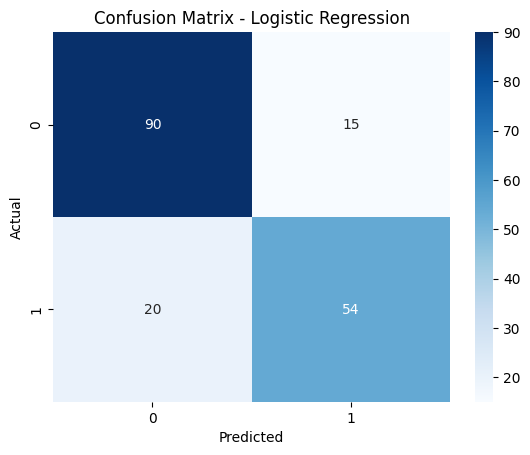


Model: kNN
Accuracy: 0.80
Precision: 0.78
Recall: 0.73
F1-Score: 0.76


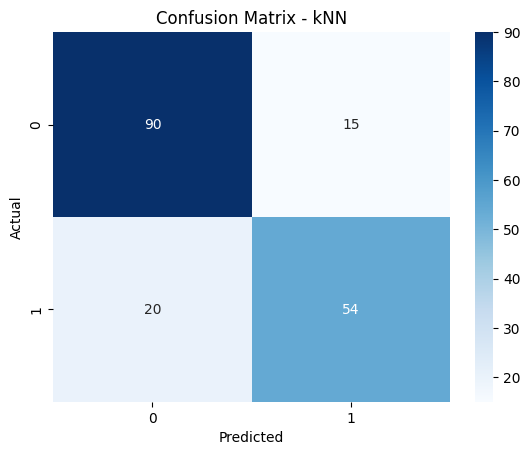


Model: SVM
Accuracy: 0.78
Precision: 0.75
Recall: 0.70
F1-Score: 0.73


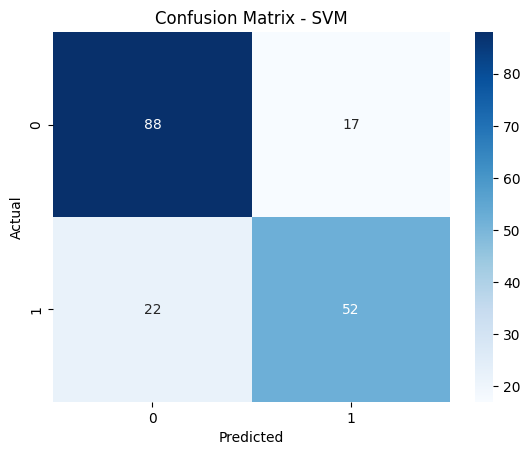

In [2]:
models = {
    'Logistic Regression': LogisticRegression(),
    'kNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', probability=True)
}

for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Evaluasi
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
